# Timing results for 2D Pressure Poisson Solver
These are the results for the different methods of solving this matrix on a 4 level mesh with the divide 2 option and strong scaling.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

# Full Matrix with Hypre (1)
This section is the timing results for solving the full matrix using Hypre. This matrix has 2,129,920 degrees of freedom.

In [2]:
DOF = 2129920
Petsc_Hypre_Full_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Full_Iterations = np.array([25,24,24,24,23,24,24])
Petsc_Hypre_Full_Residual = np.array([7.7959970105686e-11,3.7698395250881e-11,4.6445688201149e-11,9.0298349451787e-11,
                                     7.8125285574285e-11,8.8175567594805e-11,2.9253011119871e-11])
Petsc_Hypre_Full_Error = np.array([9.2304660443222e-04,9.2304660439089e-04,9.2304660437377e-04,9.0298349451787e-11,
                                  9.2304660461603e-04,9.2304660463712e-04,9.2304660489770e-04])
Petsc_Hypre_Full_Domain = np.array([0.5771762146,0.3227674969,0.1651092233,0.0904486713,0.0527356856,0.052443451,
                                   0.0381672983])
Petsc_Hypre_Full_Matrix = np.array([0.7878353477,0.5208099744,0.2800362866,0.1512065142,0.0864476525,0.0514293829,
                                   0.0353743028])
Petsc_Hypre_Full_Petsc = np.array([2.5363367318,27.8735060668,14.1987835682,5.2306352596,1.7774178884,0.6992671084,
                                  0.5350252831])
Petsc_Hypre_Full_LSS = np.array([3.3241811173,28.3943279512,14.4788363321,5.3818625687,1.8638884793,0.7507591284,
                                0.5704725933])
Petsc_Hypre_Full_LinS = np.array([16.0624597243,10.7205219595,8.4254460076,8.1471176039,7.8381800788,5.901440664,
                                 5.7809692144])
Petsc_Hypre_Full_CS = np.array([16.0624642228,10.7205349951,8.4255548989,8.153320034,7.8385614164,5.9095084751,
                               5.7848270771])
Petsc_Hypre_Full_DegF = (DOF)/Petsc_Hypre_Full_CS/Petsc_Hypre_Full_Cores
Petsc_Hypre_Full_Eff = Petsc_Hypre_Full_CS[0]/(Petsc_Hypre_Full_CS*Petsc_Hypre_Full_Cores)

d = {"Cores": Petsc_Hypre_Full_Cores,"Iterations": Petsc_Hypre_Full_Iterations,"Residual": Petsc_Hypre_Full_Residual,
    "Error": Petsc_Hypre_Full_Error,"Domain Initialization": Petsc_Hypre_Full_Domain,"Matrix Formation": Petsc_Hypre_Full_Matrix,
    "Hypre Setup": Petsc_Hypre_Full_Petsc,"Linear System Setup": Petsc_Hypre_Full_LSS,"Linear Solve": Petsc_Hypre_Full_LinS,
    "Complete Solve": Petsc_Hypre_Full_CS,"Efficiency": Petsc_Hypre_Full_Eff,"Degrees of Freedom Per Time Per Core": Petsc_Hypre_Full_DegF}
df1 =  pd.DataFrame(data = d)
df1 = df1[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df1.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,25,7.80e-11,9.23e-04,0.577176,0.787835,2.53634,3.32418,16.0625,16.0625,1,132602
1,2,24,3.77e-11,9.23e-04,0.322767,0.52081,27.8735,28.3943,10.7205,10.7205,0.749145,99338.3
2,4,24,4.64e-11,9.23e-04,0.165109,0.280036,14.1988,14.4788,8.42545,8.42555,0.4766,63198.2
3,8,24,9.03e-11,9.03e-11,0.0904487,0.151207,5.23064,5.38186,8.14712,8.15332,0.246256,32654.2
4,16,23,7.81e-11,9.23e-04,0.0527357,0.0864477,1.77742,1.86389,7.83818,7.83856,0.128072,16982.7
5,32,24,8.82e-11,9.23e-04,0.0524435,0.0514294,0.699267,0.750759,5.90144,5.90951,0.0849397,11263.2
6,64,24,2.93e-11,9.23e-04,0.0381673,0.0353743,0.535025,0.570473,5.78097,5.78483,0.0433852,5752.98


<function matplotlib.pyplot.show>

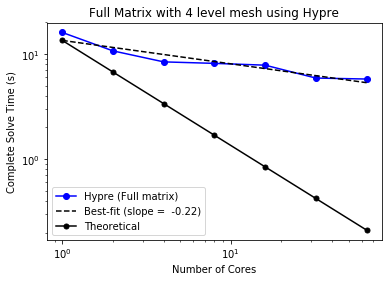

In [3]:
x = Petsc_Hypre_Full_Cores
y = Petsc_Hypre_Full_CS


plt.plot(x,y,"bo-",label="Hypre (Full matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using Hypre")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

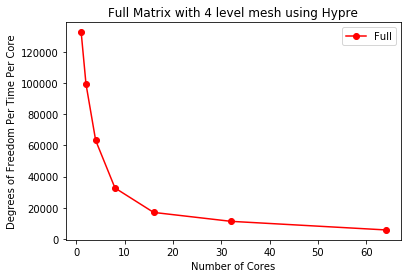

In [4]:
plt.plot(Petsc_Hypre_Full_Cores,Petsc_Hypre_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using Hypre")
plt.legend()

# Full Matrix with AMGX (2)
This section is the timing results for solving the full matrix using AMGX. This matrix has 2,129,920 degrees of freedom.

In [5]:
DOF = 2129920
Petsc_AMGX_Full_Cores = np.array([1,2,4,8])
Petsc_AMGX_Full_Iterations = np.array([39,37,38,65])
Petsc_AMGX_Full_Residual = np.array([5.8251507857323e-11,5.9432372630946e-12,5.4902317909355e-12,6.7366153106333e-12])
Petsc_AMGX_Full_Error = np.array([9.2304660445096e-04,9.2304660471372e-04,9.2304660453712e-04,9.2304660476448e-04])
Petsc_AMGX_Full_Domain = np.array([0.5903979252,0.3186255926,0.1628198647,0.0815449427])
Petsc_AMGX_Full_Matrix = np.array([0.8642156914,0.5233281249,0.2647758999,0.1360955876])
Petsc_AMGX_Full_AMGX = np.array([1.1430887716,2.2335680514,2.0293313354,1.6677904826])
Petsc_AMGX_Full_LSS = np.array([2.0073132098,2.7569079597,2.2941298202,1.803915502])
Petsc_AMGX_Full_LinS = np.array([1.462938244,1.1574490177,0.8998026873,1.2936377062])
Petsc_AMGX_Full_CS = np.array([1.4629419528,1.1574543659,0.8998145702,1.2936539742])
Petsc_AMGX_Full_DegF = (DOF)/Petsc_AMGX_Full_CS/Petsc_AMGX_Full_Cores
Petsc_AMGX_Full_Eff = Petsc_AMGX_Full_CS[0]/(Petsc_AMGX_Full_CS*Petsc_AMGX_Full_Cores)

d = {"Cores": Petsc_AMGX_Full_Cores,"Iterations": Petsc_AMGX_Full_Iterations,"Residual": Petsc_AMGX_Full_Residual,
    "Error": Petsc_AMGX_Full_Error,"Domain Initialization": Petsc_AMGX_Full_Domain,"Matrix Formation": Petsc_AMGX_Full_Matrix,
    "AMGX Setup": Petsc_AMGX_Full_AMGX,"Linear System Setup": Petsc_AMGX_Full_LSS,"Linear Solve": Petsc_AMGX_Full_LinS,
    "Complete Solve": Petsc_AMGX_Full_CS,"Efficiency": Petsc_AMGX_Full_Eff,"Degrees of Freedom Per Time Per Core": Petsc_AMGX_Full_DegF}
df2 =  pd.DataFrame(data = d)
df2 = df2[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df2.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,39,5.83e-11,9.23e-04,0.590398,0.864216,1.14309,2.00731,1.46294,1.46294,1,1.45592e+06
1,2,37,5.94e-12,9.23e-04,0.318626,0.523328,2.23357,2.75691,1.15745,1.15745,0.631965,920088
2,4,38,5.49e-12,9.23e-04,0.16282,0.264776,2.02933,2.29413,0.899803,0.899815,0.406457,591766
3,8,65,6.74e-12,9.23e-04,0.0815449,0.136096,1.66779,1.80392,1.29364,1.29365,0.141358,205805


<function matplotlib.pyplot.show>

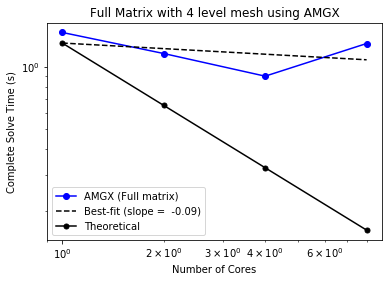

In [6]:
x = Petsc_AMGX_Full_Cores
y = Petsc_AMGX_Full_CS


plt.plot(x,y,"bo-",label="AMGX (Full matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using AMGX")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

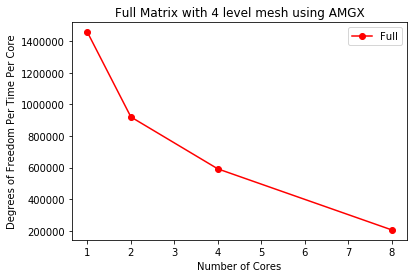

In [7]:
plt.plot(Petsc_AMGX_Full_Cores,Petsc_AMGX_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using AMGX")
plt.legend()

# Schur Matrix with Hypre (3)
This section is the timing results for solving the schur matrix using Hypre. This matrix has 2,129,920 degrees of freedom.

In [8]:
DOF = 2129920
Petsc_Hypre_Schur_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Schur_Iterations = np.array([15,16,15,15,15,15,15])
Petsc_Hypre_Schur_Residual = np.array([1.4921383876826e-11,1.7220707735628e-11,1.4581840990874e-11,1.5825807654468e-11,
                                      1.6702296611205e-11,1.3552860002989e-11,1.3209191840070e-11])
Petsc_Hypre_Schur_Error = np.array([9.2304660338315e-04,9.2304660440241e-04,9.2304660380692e-04,9.2304660390208e-04,
                                   9.2304660497885e-04,9.2304660452603e-04,9.2304660427317e-04])
Petsc_Hypre_Schur_Domain = np.array([0.5760825519,0.3183954835,0.1626387854,0.0870258676,0.0464655059,0.0241027643,
                                    0.0130447396])
Petsc_Hypre_Schur_Matrix = np.array([1.2923972976,0.6724024935,0.3957461371,0.2491670264,0.1601606103,0.0911872781,
                                     0.0480356934])
Petsc_Hypre_Schur_Petsc = np.array([1.2439340614,0.743642809,0.4749248756,0.3160935496,0.2168506626,0.1442224058,
                                   0.1274887984])
Petsc_Hypre_Schur_LSS = np.array([2.5363416905,1.4160582366,0.8706880539,0.5652815754,0.3770350551,0.2354591543,
                                 0.1755852286])
Petsc_Hypre_Schur_LinS = np.array([6.3049499966,3.9294155822,3.4292208332,3.8394493443,0.9232984641,0.4772214199,
                                  0.3042294933])
Petsc_Hypre_Schur_PatS = np.array([0.0654250609,0.0362876569,0.0593896497,0.0491331545,0.0050379279,0.002635037,
                                  0.0015443831])
Petsc_Hypre_Schur_CS = np.array([6.3703831963,3.9657228067,3.4886692446,3.8905896156,0.9283604692,0.4799156356,
                                0.3058381772])
Petsc_Hypre_Schur_DegF = (2129920)/Petsc_Hypre_Schur_CS/Petsc_Hypre_Schur_Cores
Petsc_Hypre_Schur_Eff = Petsc_Hypre_Schur_CS[0]/(Petsc_Hypre_Schur_CS*Petsc_Hypre_Schur_Cores)

d = {"Cores": Petsc_Hypre_Schur_Cores,"Iterations": Petsc_Hypre_Schur_Iterations,"Residual": Petsc_Hypre_Schur_Residual,
    "Error": Petsc_Hypre_Schur_Error,"Domain Initialization": Petsc_Hypre_Schur_Domain,"Matrix Formation": Petsc_Hypre_Schur_Matrix,
    "Hypre Setup": Petsc_Hypre_Schur_Petsc,"Linear System Setup": Petsc_Hypre_Schur_LSS,"Linear Solve": Petsc_Hypre_Schur_LinS,
    "Patch Solve": Petsc_Hypre_Schur_PatS,"Complete Solve": Petsc_Hypre_Schur_CS,"Efficiency": Petsc_Hypre_Schur_Eff,
     "Degrees of Freedom Per Time Per Core": Petsc_Hypre_Schur_DegF}
df3 =  pd.DataFrame(data = d)
df3 = df3[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df3.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,15,1.49e-11,9.23e-04,0.576083,1.2924,1.24393,2.53634,6.30495,0.0654251,6.37038,1,334347
1,2,16,1.72e-11,9.23e-04,0.318395,0.672402,0.743643,1.41606,3.92942,0.0362877,3.96572,0.803181,268541
2,4,15,1.46e-11,9.23e-04,0.162639,0.395746,0.474925,0.870688,3.42922,0.0593896,3.48867,0.456505,152631
3,8,15,1.58e-11,9.23e-04,0.0870259,0.249167,0.316094,0.565282,3.83945,0.0491332,3.89059,0.204673,68431.8
4,16,15,1.67e-11,9.23e-04,0.0464655,0.160161,0.216851,0.377035,0.923298,0.00503793,0.92836,0.428873,143393
5,32,15,1.36e-11,9.23e-04,0.0241028,0.0911873,0.144222,0.235459,0.477221,0.00263504,0.479916,0.414811,138691
6,64,15,1.32e-11,9.23e-04,0.0130447,0.0480357,0.127489,0.175585,0.304229,0.00154438,0.305838,0.325457,108816


<function matplotlib.pyplot.show>

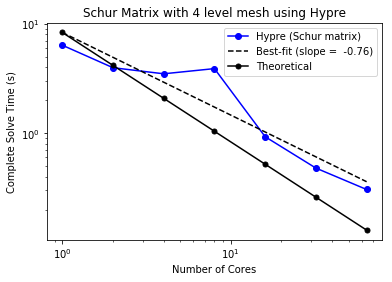

In [9]:
x = Petsc_Hypre_Schur_Cores
y = Petsc_Hypre_Schur_CS


plt.plot(x,y,"bo-",label="Hypre (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using Hypre")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

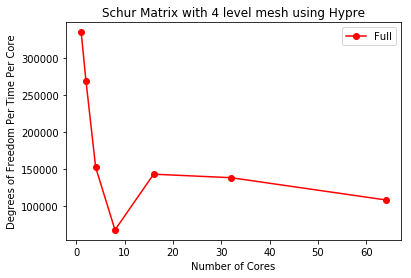

In [10]:
plt.plot(Petsc_Hypre_Schur_Cores,Petsc_Hypre_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using Hypre")
plt.legend()

# Schur Matrix with AMGX (4)
This section is the timing results for solving the schur matrix using AMGX. This matrix has 2,129,920 degrees of freedom.

In [11]:
DOF = 2129920
Petsc_AMGX_Schur_Cores = np.array([1,2,4,8])
Petsc_AMGX_Schur_Iterations = np.array([17,17,22,23])
Petsc_AMGX_Schur_Residual = np.array([1.3695817646415e-11,1.3548303935857e-11,1.8316663826715e-11,1.7930090921489e-11])
Petsc_AMGX_Schur_Error = np.array([9.2304660344892e-04,9.2304660472995e-04,9.2304659469577e-04,9.2304660479051e-04])
Petsc_AMGX_Schur_Domain = np.array([0.5855890301,0.3206256908,0.1588446304,0.0792485065])
Petsc_AMGX_Schur_Matrix = np.array([1.4475454043,0.7005159386,0.3667015114,0.2538813382])
Petsc_AMGX_Schur_AMGX = np.array([1.5284000524,0.8723155789,0.623428325,0.8332132946])
Petsc_AMGX_Schur_LSS = np.array([2.975953922,1.5728427425,0.9901511835,1.0871343354])
Petsc_AMGX_Schur_LinS = np.array([0.3923422311,0.3040044664,0.2743465336,0.2876472744])
Petsc_AMGX_Schur_PS = np.array([0.0601743763,0.033307604,0.0168305067,0.0098936041])
Petsc_AMGX_Schur_CS = np.array([0.4525222653,0.3373205181,0.2911922364,0.2975672569])
Petsc_AMGX_Schur_DegF = (DOF)/Petsc_AMGX_Schur_CS/Petsc_AMGX_Schur_Cores
Petsc_AMGX_Schur_Eff = np.array(np.ones(len(Petsc_AMGX_Schur_Cores))*Petsc_AMGX_Schur_CS[0]/(Petsc_AMGX_Schur_CS*Petsc_AMGX_Schur_Cores))

d = {"Cores": Petsc_AMGX_Schur_Cores,"Iterations": Petsc_AMGX_Schur_Iterations,"Residual": Petsc_AMGX_Schur_Residual,
    "Error": Petsc_AMGX_Schur_Error,"Domain Initialization": Petsc_AMGX_Schur_Domain,"Matrix Formation": Petsc_AMGX_Schur_Matrix,
    "AMGX Setup": Petsc_AMGX_Schur_AMGX,"Linear System Setup": Petsc_AMGX_Schur_LSS,"Linear Solve": Petsc_AMGX_Schur_LinS,
    "Patch Solve": Petsc_AMGX_Schur_PS,"Complete Solve": Petsc_AMGX_Schur_CS,"Efficiency": Petsc_AMGX_Schur_Eff,
    "Degrees of Freedom Per Time Per Core": Petsc_AMGX_Schur_DegF}
df4 =  pd.DataFrame(data = d)
df4 = df4[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","AMGX Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df4.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,AMGX Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,17,1.37e-11,9.23e-04,0.585589,1.44755,1.5284,2.97595,0.392342,0.0601744,0.452522,1,4.70677e+06
1,2,17,1.35e-11,9.23e-04,0.320626,0.700516,0.872316,1.57284,0.304004,0.0333076,0.337321,0.67076,3.15712e+06
2,4,22,1.83e-11,9.23e-04,0.158845,0.366702,0.623428,0.990151,0.274347,0.0168305,0.291192,0.388508,1.82862e+06
3,8,23,1.79e-11,9.23e-04,0.0792485,0.253881,0.833213,1.08713,0.287647,0.0098936,0.297567,0.190092,894722


<function matplotlib.pyplot.show>

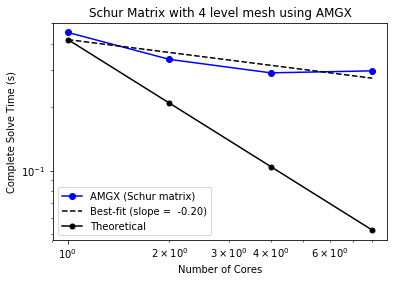

In [12]:
x = Petsc_AMGX_Schur_Cores
y = Petsc_AMGX_Schur_CS


plt.plot(x,y,"bo-",label="AMGX (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using AMGX")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

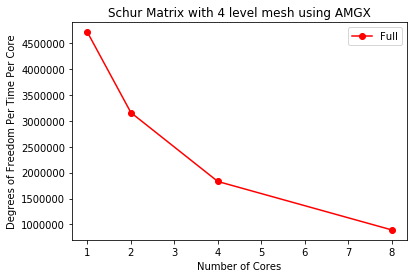

In [13]:
plt.plot(Petsc_AMGX_Schur_Cores,Petsc_AMGX_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using AMGX")
plt.legend()

# Comparison of Full vs Schur solve
First comparison is for Hypre, second for AMGX.

<function matplotlib.pyplot.show>

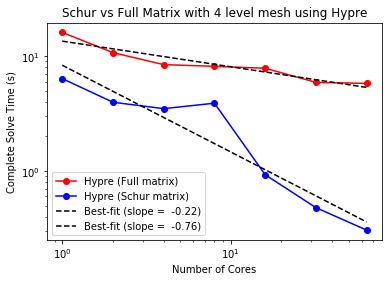

In [14]:
xf = Petsc_Hypre_Full_Cores
yf = Petsc_Hypre_Full_CS
xs = Petsc_Hypre_Schur_Cores
ys = Petsc_Hypre_Schur_CS


plt.plot(xf,yf,"ro-",label="Hypre (Full matrix)")
plt.plot(xs,ys,"bo-",label="Hypre (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur vs Full Matrix with 4 level mesh using Hypre")

cf = np.polyfit(np.log(xf),np.log(yf),1)
cs = np.polyfit(np.log(xs),np.log(ys),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

sf = "Best-fit (slope = {:6.2f})".format(cf[0])
ss = "Best-fit (slope = {:6.2f})".format(cs[0])
plt.loglog(xf,np.exp(np.polyval(cf,np.log(xf))),'k--',label=sf)
plt.loglog(xs,np.exp(np.polyval(cs,np.log(xs))),'k--',label=ss)


plt.legend()
plt.show

<function matplotlib.pyplot.show>

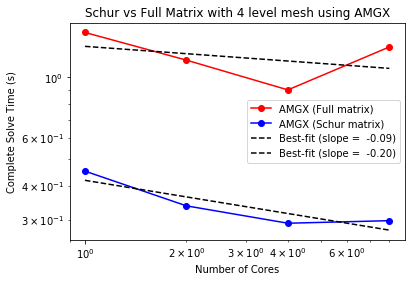

In [15]:
xf = Petsc_AMGX_Full_Cores
yf = Petsc_AMGX_Full_CS
xs = Petsc_AMGX_Schur_Cores
ys = Petsc_AMGX_Schur_CS


plt.plot(xf,yf,"ro-",label="AMGX (Full matrix)")
plt.plot(xs,ys,"bo-",label="AMGX (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur vs Full Matrix with 4 level mesh using AMGX")

cf = np.polyfit(np.log(xf),np.log(yf),1)
cs = np.polyfit(np.log(xs),np.log(ys),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

sf = "Best-fit (slope = {:6.2f})".format(cf[0])
ss = "Best-fit (slope = {:6.2f})".format(cs[0])
plt.loglog(xf,np.exp(np.polyval(cf,np.log(xf))),'k--',label=sf)
plt.loglog(xs,np.exp(np.polyval(cs,np.log(xs))),'k--',label=ss)


plt.legend()
plt.show